# DSE 200 FINAL PROJECT - Arlens Zeqollari
## Fall 2018
### Due Date:  December 7th, 2018

The final project is comprised of two parts: 
* <b>Part I</b> is a set of coding questions that require the _numpy_ library to analyze the provided dataset.  
* <b>Part II</b> is a guided project for you to build your own end-to-end analysis using Python, especially using what you learned on Python _IO_, _pandas_, _matplotlib_ and _scilitlearn_ libraries.  

<b>Deliverables</b>: Submit both parts as one notebook via Github by midnight on the due date above along with clear instructions on how to download the datasets you used for Part II and reproduce your results. The notebook should be organized with a clear table of contents on top _(see example in the Pylaski notebook from Day 5)_ and links to the parts/steps outlined. Don't forget to add your name on top as the author of the notebook. 

# PART I: 20%

### 1.1 Preliminaries

Use numpy to load `iris.npy` into a numpy matrix. Print the dataset's shape and the first 5 rows.<br>

**Output required**: 
<ul>
    <li>Tuple representing dataset's shape</li>
    <li>Matrix representing the first 5 rows</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# For use later
column_names = ['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
species_encoding = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}

In [2]:
# your solution
iris_data = np.load('iris.npy') # load data
print("iris_data shape:",iris_data.shape)          # Print shape
print(iris_data[:5])            # Print first five rows

iris_data shape: (150, 6)
[[1.  5.1 3.5 1.4 0.2 1. ]
 [2.  4.9 3.  1.4 0.2 1. ]
 [3.  4.7 3.2 1.3 0.2 1. ]
 [4.  4.6 3.1 1.5 0.2 1. ]
 [5.  5.  3.6 1.4 0.2 1. ]]


### 1.2  Transformations

The first column is the id of the sample, which isn't relevant for our purposes. Remove that column from the matrix by creating a new matrix composed of the rest of the columns.<br>
As usual, print the shape of the resulting dataset and the first 5 rows.

**Output required**: 
<ul>
    <li>Tuple representing dataset's shape</li>
    <li>Matrix representing the first 5 rows</li>
</ul>

In [3]:
# your solution
iris_data_clean = iris_data[:,1:]
print("iris_data_clean shape:",iris_data_clean.shape)          # Print shape
print(iris_data_clean[:5])            # Print first five rows

iris_data_clean shape: (150, 5)
[[5.1 3.5 1.4 0.2 1. ]
 [4.9 3.  1.4 0.2 1. ]
 [4.7 3.2 1.3 0.2 1. ]
 [4.6 3.1 1.5 0.2 1. ]
 [5.  3.6 1.4 0.2 1. ]]


### 1.3 Summary Statistics

*Note: Don't worry about the order in which you display the values in this section. Display them in whatever order/grouping makes most sense to you*

**a)** Print the means and standard deviations of each column.

**Output required**: 
<ul>
    <li>Floats representing the standard deviation of each column</li>
    <li>Floats representing the mean of each column</li>
</ul>

In [4]:
# your solution
means = np.mean(iris_data_clean,axis=0)  # get means of cols
stddevs = np.std(iris_data_clean,axis=0) # get std. dev. of cols

print("means: ",means)
print("std devs: ",stddevs)

means:  [5.84333333 3.054      3.75866667 1.19866667 2.        ]
std devs:  [0.82530129 0.43214658 1.75852918 0.76061262 0.81649658]


**b)** Print the minimum and maximum values of each column

**Output required**: 
<ul>
    <li>Floats representing the minimum value found in each column</li>
    <li>Floats representing the maximum value found in each column</li>
</ul>

In [5]:
# your solution
minimums = np.min(iris_data_clean,axis=0)  # get means of cols
maximums = np.max(iris_data_clean,axis=0) # get std. dev. of cols

print("minimums: ",minimums)
print("maximums: ",maximums)

minimums:  [4.3 2.  1.  0.1 1. ]
maximums:  [7.9 4.4 6.9 2.5 3. ]


**c)** Calculate the species-wise means and standard deviations.<br>
**Report these values with respect to the actual *name* of the species, for which you must refer to 1.1**

**Output required**: 
<ul>
    <li>For each of the 3 species in the dataset:<ul>
        <li>Floats representing the standard deviation of each column for this species</li>
        <li>Floats representing the mean of each column for this species</li>
</ul>

In [6]:
# your solution
iris_species_1 = iris_data_clean[iris_data_clean[:,4] == 1]
iris_species_2 = iris_data_clean[iris_data_clean[:,4] == 2]
iris_species_3 = iris_data_clean[iris_data_clean[:,4] == 3]

iris_species_1_means = np.mean(iris_species_1[:,:-1],axis=0)
iris_species_2_means = np.mean(iris_species_2[:,:-1],axis=0)
iris_species_3_means = np.mean(iris_species_3[:,:-1],axis=0)

print("Iris-setosa Means: ",iris_species_1_means)
print("Iris-versicolor Means: ",iris_species_2_means)
print("Iris-virginica Means: ",iris_species_3_means)

Iris-setosa Means:  [5.006 3.418 1.464 0.244]
Iris-versicolor Means:  [5.936 2.77  4.26  1.326]
Iris-virginica Means:  [6.588 2.974 5.552 2.026]


### 1.4  Advanced list comprehensions and numpy

Use **list comprehensions** to generate a list of tuples for each species.<br>
For a given species, the list will represent columns and their mean values. So, each tuple will be of the form `(column_name, column_mean)` and you'll have one per column. You can check your intuition using your **1.3c** output <br>
Note that the column names are listed in **1.1** and recall that you dropped the id column.<br><br>
Each list will have the following format:
    `[(column_name, column_mean), (column_name, column_mean), ...]`
    
   *hint*: The enumerate function might be helpful in creating a concise comprehension<br>

**Output required**: 
<ul>
    <li>Three lists of tuples. One list per species, each list has a tuple per column</li>
</ul>

In [7]:
# your solution
for species in range(0,len(species_encoding)):
    print('\nList of Tuples for Species ',species+1,':\n')
    mylist = [(column_names[i] , np.mean(iris_data_clean[iris_data_clean[:,4] == species+1],axis = 0)[i-1]) for i,column in enumerate(column_names)]
    mylist = mylist[1:-1]
    print(mylist)


List of Tuples for Species  1 :

[('SepalLengthCm', 5.005999999999999), ('SepalWidthCm', 3.4180000000000006), ('PetalLengthCm', 1.464), ('PetalWidthCm', 0.2439999999999999)]

List of Tuples for Species  2 :

[('SepalLengthCm', 5.936), ('SepalWidthCm', 2.7700000000000005), ('PetalLengthCm', 4.26), ('PetalWidthCm', 1.3259999999999998)]

List of Tuples for Species  3 :

[('SepalLengthCm', 6.587999999999998), ('SepalWidthCm', 2.9739999999999998), ('PetalLengthCm', 5.552), ('PetalWidthCm', 2.026)]


# PART II : 80%

This project is culmination of all you’ve learned in this course! You should expect to spend <b>24-32 total hours</b> on the project. Be sure to read all of the items below before starting.

There are a number of steps outlined below, but is critical that you do not view this as an entirely linear process.  Remember that the science component in data science is the creation of a hypothesis based on exploration and testing of that hypothesis through analysis.  You may need to go through many of these steps multiple times before you arrive at meaningful hypothesis or conclusions.


# AirBnB Pricing Suggestion Based on Multiple Linear Regression
## Author: Arlens Zeqollari
## Purpose
I attempted to build a machine learning model using multiple linear regression to predict the price for AirBnB listings in San Diego, Los Angeles, and San Francisco based on factors such as home features, location, and listing descriptions, and Google Trends search data. My primary goal was to answer whether a multiple linear regression can be used to accurately predict prices across distinct cities?

## Table of Contents
[1: Loading/Joining the Datasets](#Step-1:-Find-a-dataset-or-datasets)

[2: Clean Raw Data](#Step-2:-Clean-Raw-Data)

[3: Encode Categorical Variables](#Step-3:-Encode-Categorical-Variables)

[4: Exploring the Datasets](#Step-4:-Explore-the-datasets)

[5: Exploring San Diego](#Step-5:-Exploring-San-Diego)

[6: Exploring Los Angeles](#Step-6:-Exploring-Los-Angeles)

[7: Exploring San Francisco](#Step-7:-Exploring-San-Francisco)

[8: Further Insights, Scatterplot Matrix](#Step-8:-Further-Insights)

[9: Build and Analyze 1st MLR Model](#Step-9:-Build-and-Analyze-1st-MLR-Model)

[10: Build and Analyze Improved MLR Model with Engineered Features](#Step-10:-Build-and-Analyze-Improved-MLR-Model-with-Engineered-Features)

[11: Build and Analyze Final MLR Model](#Step-11:-Build-and-Analyze-Final-MLR-Model)

[12: Individual City MLR Models: San Diego](#Step-12:-Individual-City-MLR-Models-San-Diego)

[13: Individual City MLR Models: Los Angeles](#Step-13:-Individual-City-MLR-Models-Los-Angeles)

[14: Individual City MLR Models: San Francisco](#Step-14:-Individual-City-MLR-Models:-San-Francisco)

[15: Conclusion](#Step-15:-Conclusion)




## Step 1: Find a dataset or datasets

I utilized three (3) datasets obtained through InsideAirBnB, an independent open-source data tool that publishes datasets of AirBnB listings in different areas throughout the globe. I focused on a few of California's most populous cities, shown below:

- __[Los Angeles](http://data.insideairbnb.com/united-states/ca/los-angeles/2018-11-04/data/listings.csv.gz)__
- __[San Francisco](http://data.insideairbnb.com/united-states/ca/san-francisco/2018-11-03/data/listings.csv.gz)__
- __[San Diego](http://data.insideairbnb.com/united-states/ca/san-diego/2018-10-11/data/listings.csv.gz)__
    
In addition, a Google Trends search was produced to calculate a custom "demand" metric. The Google Trends search can be queried __[here](https://trends.google.com/trends/explore?date=all&q=san%20diego%20airbnb,los%20angeles%20airbnb,san%20francisco%20airbnb)__.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load datasets
los_angeles = pd.read_csv("la_listings_2.csv")
san_diego = pd.read_csv('sd_listings_2.csv')
san_francisco = pd.read_csv('sf_listings_2.csv')

# Load Google Trends data for SD, LA, and SF AirBnB web searches. 
google_trends_data = pd.read_csv('GoogleTrends_sf_sd_la.csv')

In [9]:
# Remove host name (privacy)
los_angeles = los_angeles.drop("host_name",axis = 1)
san_diego = san_diego.drop("host_name",axis = 1)
san_francisco = san_francisco.drop("host_name",axis = 1)

# Remove additional uneccessary/private columns
los_angeles = los_angeles.drop(labels = ['scrape_id','last_scraped','experiences_offered','notes','transit','access','interaction','house_rules',
                                         'thumbnail_url','medium_url','picture_url','xl_picture_url','host_id','host_url','host_about', 'neighbourhood',
                                         'host_thumbnail_url','host_picture_url','host_verifications','host_identity_verified','smart_location','state',
                                         'is_location_exact','security_deposit','cleaning_fee','guests_included','extra_people','calendar_updated',
                                         'calendar_last_scraped','requires_license','license','jurisdiction_names','require_guest_profile_picture'],axis = 1)

san_diego = san_diego.drop(labels = ['scrape_id','last_scraped','experiences_offered','notes','transit','access','interaction','house_rules',
                                         'thumbnail_url','medium_url','picture_url','xl_picture_url','host_id','host_url','host_about','neighbourhood',
                                         'host_thumbnail_url','host_picture_url','host_verifications','host_identity_verified','smart_location','state',
                                         'is_location_exact','security_deposit','cleaning_fee','guests_included','extra_people','calendar_updated',
                                         'calendar_last_scraped','requires_license','license','jurisdiction_names','require_guest_profile_picture'],axis = 1)

san_francisco = san_francisco.drop(labels = ['scrape_id','last_scraped','experiences_offered','notes','transit','access','interaction','house_rules',
                                         'thumbnail_url','medium_url','picture_url','xl_picture_url','host_id','host_url','host_about','neighbourhood',
                                         'host_thumbnail_url','host_picture_url','host_verifications','host_identity_verified','smart_location','state',
                                         'is_location_exact','security_deposit','cleaning_fee','guests_included','extra_people','calendar_updated',
                                         'calendar_last_scraped','requires_license','license','jurisdiction_names','require_guest_profile_picture'],axis = 1)

In [10]:
# Create city variable for each dataset
los_angeles["city"] = "Los Angeles"
san_diego["city"] = "San Diego"
san_francisco["city"] = "San Francisco"

Google Trends data can be used to calculate a metric for demand by determining how many monthly searches of the following occurred over a given period of time:
- "AirBnB San Diego"
- "AirBnB Los Angeles"
- "AirBnB San Francisco"

I then averaged these results for each city to determine how many searches have occured per month in 2018.

Lastly, I normalized the average number of monthly searches in 2018 by dividing by each city's population. Now, we can have a reasonable metric for determining demand for AirBnB rentals, which may be an indicator in price for a city's listings.

In [11]:
# Filter Google Trends data to 2018 only
google_trends_data = google_trends_data[google_trends_data['Month'].str.contains('2018') == True]

# Define populations of each city in millions
sd_population = 1394928 / 1e6
la_population = 3971883 / 1e6
sf_population = 884521 / 1e6

# Determine number of listing in each city
sd_num_listings = len(san_diego)
la_num_listings = len(los_angeles)
sf_num_listings = len(san_francisco)


# Determine "demand" score by averaging 2018 search data for each city
sd_demand_score = google_trends_data['san diego airbnb: (Worldwide)'].mean() / sd_num_listings #sd_population
la_demand_score = google_trends_data['los angeles airbnb: (Worldwide)'].mean() / la_num_listings #la_population
sf_demand_score = google_trends_data['san francisco airbnb: (Worldwide)'].mean() / sf_num_listings #sf_population

# Add "demand" score to each listings dataset
los_angeles["demand score"] = la_demand_score
san_diego["demand score"] = sd_demand_score
san_francisco["demand score"] = sf_demand_score

In [12]:
# Stack LA, SD, and SF datasets together
data_all_cities = pd.concat([los_angeles,san_diego,san_francisco])
data_all_cities.head(4)

id                        listing_url  \
0   109   https://www.airbnb.com/rooms/109   
1   344   https://www.airbnb.com/rooms/344   
2  2404  https://www.airbnb.com/rooms/2404   
3  2708  https://www.airbnb.com/rooms/2708   

                                                name  \
0  Amazing bright elegant condo park front *UPGRA...   
1                  Family perfect;Pool;Near Studios!   
2                                            deleted   
3  Gold Memory Foam Bed & Breakfast in West Holly...   

                                             summary  \
0  *** Unit upgraded with new bamboo flooring, br...   
1  This home is perfect for families; aspiring ch...   
2                                                NaN   
3  Our best memory foam pillows you'll ever sleep...   

                                               space  \
0  *** Unit upgraded with new bamboo flooring, br...   
1  Cheerful & comfortable; near studios, amusemen...   
2                                            deleted   
3  This space is completely upgraded and updated....   

                                         description  \
0  *** Unit upgraded with new bamboo flooring, br...   
1  This home is perfect for families; aspiring ch...   
2                                            deleted   
3  Our best memory foam pillows you'll ever sleep...   

                               neighborhood_overview  host_since  \
0                                                NaN  2008-06-27   
1  Quiet-yet-close to all the fun in LA! Hollywoo...  2008-07-11   
2                                                NaN  2008-08-30   
3  We are minutes away from the Mentor Language I...  2008-09-16   

                              host_location  host_response_time      ...       \
0  San Francisco, California, United States                 NaN      ...        
1        Burbank, California, United States  within a few hours      ...        
2                                        US                 NaN      ...        
3    Los Angeles, California, United States      within an hour      ...        

  review_scores_communication  review_scores_location review_scores_value  \
0                         8.0                    10.0                 8.0   
1                        10.0                    10.0                 9.0   
2                         NaN                     NaN                 NaN   
3                        10.0                    10.0                10.0   

  instant_bookable  is_business_travel_ready          cancellation_policy  \
0                f                         f  strict_14_with_grace_period   
1                t                         f                     flexible   
2                f                         f                     moderate   
3                t                         f  strict_14_with_grace_period   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              1   
1                                f                              1   
2                                f                              1   
3                                f                              2   

  reviews_per_month  demand score  
0              0.02      0.001987  
1              0.14      0.001987  
2               NaN      0.001987  
3              0.24      0.001987  

[4 rows x 63 columns]

Raw dataset is now compiled. There is still a lot of cleaning to be done, however...

## Step 2: Clean Raw Data
In summary, the primary removals and modifications to the raw data were as follows:
- Removed Uneccessary columns and columns that have >30% of values missing.
- Prices were turned into integer values, and filtered such that only listings > $20/night were kept.
- Filtered dataset for hosts that have 3 or more reviews only.

In [13]:
# Remove all columns that have > 30% of values missing.
filtered_data_all_cities = data_all_cities
for column in data_all_cities.keys():
    if data_all_cities[column].isnull().sum() > len(data_all_cities)*0.30:
        filtered_data_all_cities = filtered_data_all_cities.drop(labels = column, axis = 1)
    else:
        continue

In [14]:
# View number of NaN in each column
filtered_data_all_cities.isna().sum()

id                                      0
listing_url                             0
name                                    8
summary                              2145
space                               16771
description                           885
host_since                              7
host_location                         217
host_is_superhost                       7
host_neighbourhood                  11159
host_listings_count                     7
host_total_listings_count               7
host_has_profile_pic                    7
street                                  0
neighbourhood_cleansed                  0
city                                    0
zipcode                               958
market                                130
country_code                            0
country                                 0
latitude                                0
longitude                               0
property_type                           0
room_type                         

In [15]:
# Remove any rows that contain NaN for columns I intend to have in this project/analysis.
filtered_data_all_cities = filtered_data_all_cities.dropna(
    subset = ['review_scores_communication','review_scores_location','review_scores_value','reviews_per_month',
              'review_scores_cleanliness','review_scores_checkin','review_scores_rating','review_scores_accuracy',
              'bathrooms','bedrooms','beds','host_listings_count','name'
             ])

# Remove dollar sign ($) and "," from price column.
filtered_data_all_cities['price'] = filtered_data_all_cities['price'].str.replace(',', '')
filtered_data_all_cities['price'] = filtered_data_all_cities['price'].str.replace('$', '')
filtered_data_all_cities['price'] = filtered_data_all_cities['price'].astype('float')

# Remove rows with price = < $20
filtered_data_all_cities = filtered_data_all_cities[filtered_data_all_cities['price'] > 20]

# Remove rows that are not in the United States
filtered_data_all_cities = filtered_data_all_cities[filtered_data_all_cities['country'] == 'United States']

# Filter dataset for hosts with 3 or more reviews
filtered_data_all_cities = filtered_data_all_cities[filtered_data_all_cities["number_of_reviews"] >= 3]
filtered_data_all_cities.head()

id                        listing_url  \
1   344   https://www.airbnb.com/rooms/344   
3  2708  https://www.airbnb.com/rooms/2708   
4  2732  https://www.airbnb.com/rooms/2732   
6  3021  https://www.airbnb.com/rooms/3021   
7  5728  https://www.airbnb.com/rooms/5728   

                                                name  \
1                  Family perfect;Pool;Near Studios!   
3  Gold Memory Foam Bed & Breakfast in West Holly...   
4                              Zen Life at the Beach   
6    Hollywood Hills Zen Modern style Apt/Guesthouse   
7    Tiny Home in Artistic Oasis near Venice and LAX   

                                             summary  \
1  This home is perfect for families; aspiring ch...   
3  Our best memory foam pillows you'll ever sleep...   
4                                                NaN   
6  A very Modern Hollywood Hills Zen style galler...   
7  Our home is located near Venice Beach without ...   

                                               space  \
1  Cheerful & comfortable; near studios, amusemen...   
3  This space is completely upgraded and updated....   
4  This is a three story townhouse with the follo...   
6  Stay amongst the Stars when you visit the Holl...   
7  Do you want to live in paradise? We have a ver...   

                                         description  host_since  \
1  This home is perfect for families; aspiring ch...  2008-07-11   
3  Our best memory foam pillows you'll ever sleep...  2008-09-16   
4  This is a three story townhouse with the follo...  2008-09-17   
6  A very Modern Hollywood Hills Zen style galler...  2008-10-02   
7  Our home is located near Venice Beach without ...  2009-03-05   

                             host_location host_is_superhost  \
1       Burbank, California, United States                 f   
3   Los Angeles, California, United States                 t   
4  Santa Monica, California, United States                 f   
6   Los Angeles, California, United States                 f   
7   Los Angeles, California, United States                 f   

  host_neighbourhood     ...       review_scores_communication  \
1            Burbank     ...                              10.0   
3          Hollywood     ...                              10.0   
4       Santa Monica     ...                              10.0   
6      Laurel Canyon     ...                               9.0   
7            Del Rey     ...                              10.0   

   review_scores_location review_scores_value instant_bookable  \
1                    10.0                 9.0                t   
3                    10.0                10.0                t   
4                    10.0                 9.0                f   
6                     9.0                 8.0                f   
7                     9.0                 9.0                t   

  is_business_travel_ready          cancellation_policy  \
1                        f                     flexible   
3                        f  strict_14_with_grace_period   
4                        f  strict_14_with_grace_period   
6                        f  strict_14_with_grace_period   
7                        f                     moderate   

  require_guest_phone_verification calculated_host_listings_count  \
1                                f                              1   
3                                f                              2   
4                                f                              2   
6                                f                              3   
7                                f                              4   

  reviews_per_month demand score  
1              0.14     0.001987  
3              0.24     0.001987  
4              0.19     0.001987  
6              0.35     0.001987  
7              1.87     0.001987  

[5 rows x 55 columns]

In [16]:
filtered_data_all_cities.describe()

id  host_listings_count  host_total_listings_count  \
count  4.112600e+04         41126.000000               41126.000000   
mean   1.544655e+07            11.454311                  11.454311   
std    8.370282e+06            77.664848                  77.664848   
min    6.000000e+00             0.000000                   0.000000   
25%    8.190567e+06             1.000000                   1.000000   
50%    1.670685e+07             2.000000                   2.000000   
75%    2.237390e+07             5.000000                   5.000000   
max    2.949566e+07          1535.000000                1535.000000   

           latitude     longitude  accommodates     bathrooms      bedrooms  \
count  41126.000000  41126.000000  41126.000000  41126.000000  41126.000000   
mean      34.249807   -118.597092      3.760054      1.370398      1.399577   
std        1.389965      1.486990      2.557422      0.777186      1.026088   
min       32.542752   -122.513065      1.000000      0.000000      0.000000   
25%       33.916110   -118.450495      2.000000      1.000000      1.000000   
50%       34.055899   -118.327129      3.000000      1.000000      1.000000   
75%       34.113914   -118.125640      5.000000      1.500000      2.000000   
max       37.810306   -116.934752     40.000000     11.500000     11.000000   

               beds         price      ...       review_scores_rating  \
count  41126.000000  41126.000000      ...               41126.000000   
mean       2.029130    166.180275      ...                  95.037057   
std        1.662321    227.729242      ...                   5.618401   
min        0.000000     21.000000      ...                  20.000000   
25%        1.000000     75.000000      ...                  93.000000   
50%        1.000000    115.000000      ...                  97.000000   
75%        3.000000    185.000000      ...                  99.000000   
max       32.000000  10000.000000      ...                 100.000000   

       review_scores_accuracy  review_scores_cleanliness  \
count            41126.000000               41126.000000   
mean                 9.713831                   9.533750   
std                  0.570588                   0.714771   
min                  2.000000                   2.000000   
25%                 10.000000                   9.000000   
50%                 10.000000                  10.000000   
75%                 10.000000                  10.000000   
max                 10.000000                  10.000000   

       review_scores_checkin  review_scores_communication  \
count           41126.000000                 41126.000000   
mean                9.833803                     9.821403   
std                 0.463029                     0.482778   
min                 2.000000                     2.000000   
25%                10.000000                    10.000000   
50%                10.000000                    10.000000   
75%                10.000000                    10.000000   
max                10.000000                    10.000000   

       review_scores_location  review_scores_value  \
count            41126.000000         41126.000000   
mean                 9.693673             9.523659   
std                  0.563206             0.646496   
min                  2.000000             2.000000   
25%                  9.000000             9.000000   
50%                 10.000000            10.000000   
75%                 10.000000            10.000000   
max                 10.000000            10.000000   

       calculated_host_listings_count  reviews_per_month  demand score  
count                    41126.000000       41126.000000  41126.000000  
mean                         5.757988           2.261371      0.003970  
std                         13.316361           2.278714      0.003294  
min                          1.000000           0.040000      0.001987  
25%                          1.000000           0.610000      0.

In [17]:
print("All data: ",data_all_cities.shape)
print('Data with >= 3 reviews: ',filtered_data_all_cities.shape)

All data:  (63253, 63)
Data with >= 3 reviews:  (41126, 55)


In [18]:
# Visualize removed data with original data, confirm we don't lose too much data
plt.figure(figsize = [15,4]);
plt.hist(data_all_cities.number_of_reviews,bins = 100,range=[0,100]);

# Remove new listings and listings without 3 or more reviews
plt.hist(filtered_data_all_cities.number_of_reviews,bins = 100,range=[0,100],);
plt.xlabel("Number of Reviews");
plt.ylabel('Frequency');
plt.title('Histogram of Number of Reviews per Listing in San Diego, San Franscisco, and Los Angeles');
plt.legend(['Original Dataset','Filtered Dataset >= 3 Reviews']);

## Step 3: Encode Categorical Variables
Here, I needed to encode numeric values for certain categorical columns, such that I could utilize the values for modeling purposes.
- True/False were converted into 1 and 0.
- Other categorical variables were converted using Python's 'get_dummies' method.

This greatly increases the dimensions of the dataframe, but provides great value in being able to encode for features such as whether an AirBnB listing is an "entire home" or a "shared room", features that are likely to be very important in building a model for price.

In [19]:
# Encode numerical values for True/False variables
filtered_data_all_cities = pd.get_dummies(filtered_data_all_cities,columns = ['host_is_superhost'])
filtered_data_all_cities = pd.get_dummies(filtered_data_all_cities,columns = ['instant_bookable'])
filtered_data_all_cities = pd.get_dummies(filtered_data_all_cities,columns = ['host_has_profile_pic'])
filtered_data_all_cities = pd.get_dummies(filtered_data_all_cities,columns = ['require_guest_phone_verification'])

filtered_data_all_cities = filtered_data_all_cities.drop(labels = 'host_is_superhost_f',axis = 1)
filtered_data_all_cities = filtered_data_all_cities.drop(labels = 'instant_bookable_f',axis = 1)
filtered_data_all_cities = filtered_data_all_cities.drop(labels = 'host_has_profile_pic_f',axis = 1)
filtered_data_all_cities = filtered_data_all_cities.drop(labels = 'require_guest_phone_verification_f',axis = 1)

In [20]:
# Encode numerical values for categorical variables
filtered_data_all_cities = pd.get_dummies(filtered_data_all_cities,columns = ['room_type'])
filtered_data_all_cities = pd.get_dummies(filtered_data_all_cities,columns = ['property_type'])
filtered_data_all_cities = pd.get_dummies(filtered_data_all_cities,columns = ['cancellation_policy'])


In [21]:
# neighbourhood_cleansed and city are necessary for plotting so get_dummies is instructed to work on another copy of the column.
filtered_data_all_cities['neighbourhood_cleansed_copy'] = filtered_data_all_cities['neighbourhood_cleansed']
filtered_data_all_cities['city_copy'] = filtered_data_all_cities['city']

filtered_data_all_cities = pd.get_dummies(filtered_data_all_cities,columns = ['neighbourhood_cleansed_copy'])
filtered_data_all_cities = pd.get_dummies(filtered_data_all_cities,columns = ['city_copy'])
filtered_data_all_cities.head()

id                        listing_url  \
1   344   https://www.airbnb.com/rooms/344   
3  2708  https://www.airbnb.com/rooms/2708   
4  2732  https://www.airbnb.com/rooms/2732   
6  3021  https://www.airbnb.com/rooms/3021   
7  5728  https://www.airbnb.com/rooms/5728   

                                                name  \
1                  Family perfect;Pool;Near Studios!   
3  Gold Memory Foam Bed & Breakfast in West Holly...   
4                              Zen Life at the Beach   
6    Hollywood Hills Zen Modern style Apt/Guesthouse   
7    Tiny Home in Artistic Oasis near Venice and LAX   

                                             summary  \
1  This home is perfect for families; aspiring ch...   
3  Our best memory foam pillows you'll ever sleep...   
4                                                NaN   
6  A very Modern Hollywood Hills Zen style galler...   
7  Our home is located near Venice Beach without ...   

                                               space  \
1  Cheerful & comfortable; near studios, amusemen...   
3  This space is completely upgraded and updated....   
4  This is a three story townhouse with the follo...   
6  Stay amongst the Stars when you visit the Holl...   
7  Do you want to live in paradise? We have a ver...   

                                         description  host_since  \
1  This home is perfect for families; aspiring ch...  2008-07-11   
3  Our best memory foam pillows you'll ever sleep...  2008-09-16   
4  This is a three story townhouse with the follo...  2008-09-17   
6  A very Modern Hollywood Hills Zen style galler...  2008-10-02   
7  Our home is located near Venice Beach without ...  2009-03-05   

                             host_location host_neighbourhood  \
1       Burbank, California, United States            Burbank   
3   Los Angeles, California, United States          Hollywood   
4  Santa Monica, California, United States       Santa Monica   
6   Los Angeles, California, United States      Laurel Canyon   
7   Los Angeles, California, United States            Del Rey   

   host_listings_count           ...             \
1                  1.0           ...              
3                  2.0           ...              
4                  2.0           ...              
6                  3.0           ...              
7                  5.0           ...              

   neighbourhood_cleansed_copy_Willowbrook  \
1                                        0   
3                                        0   
4                                        0   
6                                        0   
7                                        0   

  neighbourhood_cleansed_copy_Wilmington  \
1                                      0   
3                                      0   
4                                      0   
6                                      0   
7                                      0   

  neighbourhood_cleansed_copy_Windsor Square  \
1                                          0   
3                                          0   
4                                          0   
6                                          0   
7                                          0   

  neighbourhood_cleansed_copy_Winnetka  \
1                                    0   
3                                    0   
4                                    0   
6                                    0   
7                                    0   

  neighbourhood_cleansed_copy_Wooded Area  \
1                                       0   
3                                       0   
4                                       0   
6                                       0   
7                                       0   

  neighbourhood_cleansed_copy_Woodland Hills  \
1                                          0   
3                                          0   
4                                          0   
6                                          0   
7              

## Step 4: Explore the datasets

The listings data can be visualized by price on a map of California (shown below).

In [22]:
import bokeh
from bokeh.sampledata import us_states, us_counties, us_cities
from bokeh.plotting import *
from bokeh.models import LogColorMapper, ColorBar, LogTicker
from bokeh.palettes import Reds9 as palette

us_states = us_states.data.copy()
us_counties = us_counties.data.copy()
us_cities = us_cities.data.copy()

In [23]:
ca_counties = {
    code: county for code, county in us_counties.items() if county["state"] == "ca"
}

county_xs = [county["lons"] for county in ca_counties.values()]
county_ys = [county["lats"] for county in ca_counties.values()]

In [24]:
output_notebook()

TOOLS = "pan,wheel_zoom,reset,hover,save,box_zoom"

# init figure
p = figure(title="AirBnB Listings by Price in San Francisco, Los Angeles, and San Diego Counties", tools = TOOLS,
           x_axis_location=None, y_axis_location=None,
           toolbar_location="left", plot_width=1000, plot_height=1100,
          tooltips=[
        ("Name", "@description"), ("Price", "$@price"), ('Lat', "@x"), ('Lon', '@y'), ('Neighborhood', '@neighborhood')
    ])

# Draw county lines
p.patches(county_xs, county_ys, fill_color = '#1d2430', line_color = 'black')

# The scatter markers
listings_xs = filtered_data_all_cities['longitude']
listings_ys = filtered_data_all_cities['latitude']
description = filtered_data_all_cities['name']
neighborhood = filtered_data_all_cities['neighbourhood_cleansed']
price = filtered_data_all_cities['price']

data=dict(
    x=listings_xs,
    y=listings_ys,
    description=description,
    neighborhood=neighborhood,
    price=price
)

palette.reverse()
color_mapper = LogColorMapper(palette=palette)

p.scatter('x', 'y', source = data, 
          fill_color={'field': 'price', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.05)

# Draw Legend
color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                     label_standoff=0, border_line_color=None, location=(0,0))

p.add_layout(color_bar, 'center')

p.title.align = 'center'

# show results
show(p)

Loading BokehJS ...

A few very interesting observations can be made from the state level. We see that the listings in San Francisco are very closely populated (given the size of San Francisco). Los Angeles has much more broadly scattered listings, and San Diego is somewhere in between. 

All cities have pockets of very high price (dark red) areas that appear closely concentrated to coastal regions. This is understandable, as many visitors and tourists will choose an AirBnB that is close to the views and activities of the beach. From my own experience, I've often gotten questions from potential guests (particularly ones from out-of-state) about how close my rental is from the beach (despite it being some 20+ miles from the beach). Los Angeles sees hot spots in price in the coastal areas like Hermosa Beach, Santa Monica, and Malibu. Other hot spots can be seen in LA County's Catalina Island and notoriously wealthy Beverly Hills. San Diego sees hot spots in price in areas such as La Jolla, Mission Beach, and Downtown. And San Francisco listings are generally priced higher in areas near the Bay. 

We see from this data that longitude and latitude itself won't be a reliable predictor of price, as it would only indicate which city the listing is from. This is because SF is inherently more westerly and northerly than LA and SD. As such, this will likely yield inconsequential results in a model for price, or at least be collinear with a variable for city.

Let's peer into each city separately...

# Step 5: Exploring San Diego

In [25]:
sd_filtered_data = filtered_data_all_cities[filtered_data_all_cities['city'] == 'San Diego']

In [26]:
sd_filtered_data = filtered_data_all_cities[filtered_data_all_cities['city'] == 'San Diego']

sd_cities = {
    code: city for code, city in us_counties.items() if city["name"] == "San Diego"
}

sd_county_xs = [county["lons"] for county in sd_cities.values()]
sd_county_ys = [county["lats"] for county in sd_cities.values()]

In [27]:
output_notebook()

TOOLS = "pan,wheel_zoom,reset,hover,save,box_zoom"

# init figure
p2 = figure(title="AirBnB Listings by Price in San Diego County", tools = TOOLS,
            x_axis_location=None, y_axis_location=None,
            x_range = [-117.4,-116.92], y_range = [32.5,33.1],
            toolbar_location="left", plot_width=1000, plot_height=1100,
            tooltips=[
                ("Name", "@description"), ("Price", "$@price"), ("Lat", "@x"), ("Lon", "@y"),("Neighborhood","@neighborhood")
            ])

# Draw county lines
p2.patches(sd_county_xs, sd_county_ys, fill_color = '#1d2430', line_color = 'black')


# The scatter markers
listings_xs = sd_filtered_data['longitude']
listings_ys = sd_filtered_data['latitude']
description = sd_filtered_data['name']
neighborhood = sd_filtered_data['neighbourhood_cleansed']
price = sd_filtered_data['price']

data=dict(
    x=listings_xs,
    y=listings_ys,
    description=description,
    neighborhood=neighborhood,
    price=price
)

color_mapper = LogColorMapper(palette=palette)

p2.scatter('x', 'y', source = data, 
          fill_color={'field': 'price', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.01, size = 5)

# Draw Legend
color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                     label_standoff=0, border_line_color=None, location=(0,0))

p2.add_layout(color_bar, 'center')

p2.title.align = 'center'

# show results
show(p2)

Loading BokehJS ...

# Step 6: Exploring Los Angeles

In [28]:
la_filtered_data = filtered_data_all_cities[filtered_data_all_cities['city'] == 'Los Angeles']

la_cities = {
    code: city for code, city in us_counties.items() if city["name"] == "Los Angeles"
}

la_county_xs = [county["lons"] for county in la_cities.values()]
la_county_ys = [county["lats"] for county in la_cities.values()]

In [29]:
output_notebook()

TOOLS = "pan,wheel_zoom,reset,hover,save,box_zoom"

# init figure
p3 = figure(title="AirBnB Listings by Price in Los Angeles County", tools = TOOLS,
            x_axis_location=None, y_axis_location=None,
            #x_range = [-117.4,-116.85], 
            y_range = [33.25,34.75],
            toolbar_location="left", plot_width=1000, plot_height=1100,
            tooltips=[
                ("Name", "@description"), ("Price", "$@price"), ("Lat", "@x"), ("Lon", "@y"),("Neighborhood","@neighborhood")
            ])

# Draw county lines
p3.patches(la_county_xs, la_county_ys, fill_color = '#1d2430', line_color = 'black')


# The scatter markers
listings_xs = la_filtered_data['longitude']
listings_ys = la_filtered_data['latitude']
description = la_filtered_data['name']
neighborhood = la_filtered_data['neighbourhood_cleansed']
price = la_filtered_data['price']

data=dict(
    x=listings_xs,
    y=listings_ys,
    description=description,
    neighborhood=neighborhood,
    price=price
)

color_mapper = LogColorMapper(palette=palette)

p3.scatter('x', 'y', source = data, 
          fill_color={'field': 'price', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.01, size = 5)

# Draw Legend
color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                     label_standoff=0, border_line_color=None, location=(0,0))

p3.add_layout(color_bar, 'center')

p3.title.align = 'center'

# show results
show(p3)

Loading BokehJS ...

# Step 7: Exploring San Francisco

In [30]:
sf_filtered_data = filtered_data_all_cities[filtered_data_all_cities['city'] == 'San Francisco']

sf_cities = {
    code: city for code, city in us_counties.items() if city["name"] == "San Francisco"
}

sf_county_xs = [county["lons"] for county in sf_cities.values()]
sf_county_ys = [county["lats"] for county in sf_cities.values()]

In [31]:
output_notebook()

TOOLS = "pan,wheel_zoom,reset,hover,save,box_zoom"

# init figure
p4 = figure(title="AirBnB Listings by Price in San Francisco County", tools = TOOLS,
            x_axis_location=None, y_axis_location=None,
            x_range = [-122.52,-122.38], 
            y_range = [37.7,37.84],
            toolbar_location="left", plot_width=1000, plot_height=1100,
            tooltips=[
                ("Name", "@description"), ("Price", "$@price"), ("Lat", "@x"), ("Lon", "@y"),("Neighborhood","@neighborhood")
            ])

# Draw county lines
p4.patches(sf_county_xs, sf_county_ys, fill_color = '#1d2430', line_color = 'black')


# The scatter markers
listings_xs = sf_filtered_data['longitude']
listings_ys = sf_filtered_data['latitude']
description = sf_filtered_data['name']
neighborhood = sf_filtered_data['neighbourhood_cleansed']
price = sf_filtered_data['price']

data=dict(
    x=listings_xs,
    y=listings_ys,
    description=description,
    neighborhood = neighborhood,
    price=price
)

color_mapper = LogColorMapper(palette=palette)

p4.scatter('x', 'y', source = data, 
          fill_color={'field': 'price', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.01, size = 5)

# Draw Legend
color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                     label_standoff=0, border_line_color=None, location=(0,0))

p4.add_layout(color_bar, 'center')

p4.title.align = 'center'

# show results
show(p4)

Loading BokehJS ...

## Step 8: Further Insights

A good place to continue developing insights into this data for model building is a scatterplot matrix. This can be produced using the Seaborn library. A Scatterplot matrix helps visualize correlations across several variables at once. This can be combined with a distribution plot at each self-intersection of the scatterplot matrix to provide additional information.

Let's first identify some strong correlations prior to creating the scatterplot matrix, because creating a scatterplot matrix from *all* variables would be very computationally expensive...

In [32]:
# Identify strong correlations to price
correlations_to_price = filtered_data_all_cities.corr().price.abs().sort_values(ascending = False)
correlations_to_price

price                                                  1.000000
bedrooms                                               0.508935
accommodates                                           0.476497
bathrooms                                              0.473605
beds                                                   0.380208
room_type_Entire home/apt                              0.269091
room_type_Private room                                 0.249122
property_type_Villa                                    0.158707
neighbourhood_cleansed_copy_Malibu                     0.146848
neighbourhood_cleansed_copy_Hollywood Hills West       0.130871
cancellation_policy_super_strict_60                    0.127057
cancellation_policy_strict_14_with_grace_period        0.118730
reviews_per_month                                      0.113841
cancellation_policy_flexible                           0.108692
neighbourhood_cleansed_copy_Mission Bay                0.097734
property_type_House                     

We observe that the **number of bedrooms**, **number of people accomodates**, **number of bathrooms**, **number of beds**, and even whether the property is a **villa** or not are very important indicators of listing price (i.e. they are well correlated, and have a correlation coefficient close to 1).

Interestingly and unfortunately, **demand score** does not appear to be a highly predictive indicator of listing price. This can be for several reasons. While Google searches for 'AirBnB San Diego' or 'AirBnB Los Angeles' can be used to determine a general level of interest for rentals in the area, it does not necessarily capture the majority of bookings done through AirBnB. It's likely that most bookings are achieved through the application/website itself, without first entering a Google search. Additionally, certain areas may be more synonymous with the neighborhood (example: "Hollywood", "Balboa Park", etc.) as opposed to the city. This may bias the demand score significantly. Larger land areas like Los Angeles are likely to be affected more by this than smaller areas such as San Francisco, as a would-be renter would be more likely to use a specific term that would be closer in miles to their desired destination. Further, there are other applications (HomeAway, VRBO, etc) that may have different market penetration in these areas, further biasing results.

Regardless, we can pick a handful of the best correlations with price thus far and produce a scatterplot matrix...

In [33]:
# Pick top 7 correlations to price for extended analysis in scatterplot matrix
top_7_price_factors = correlations_to_price.keys()[1:8] # skip first one because it is price.
top_7_price_factors = top_7_price_factors.values.tolist()
top_7_price_factors

['bedrooms',
 'accommodates',
 'bathrooms',
 'beds',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'property_type_Villa']

In [34]:
scatterplot_matrix_data = filtered_data_all_cities[top_7_price_factors + ['city'] + ['price']] # also added city to color by city


In [35]:
# Create scatterplot matrix of top 7 factors
sns.set(style="ticks")
sns.pairplot(scatterplot_matrix_data, hue = 'city', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4);

/anaconda3/envs/Python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


## Some Observations:
- Home characteristics like bedrooms, number of guests accomodated, bathrooms, and beds are good predictors of the home price. This is expected and can be generalized to all locations.
- Room type being an entire home/apt or private room was well correlated with price. This was also the case for property type, particularly for villas. We also see that SF has a disproportionately low number of room types listed as "entire home/apt". This is not surprising, as the listings make up very densely populated urban areas primarily (high-rises, high-occupancy dwellings, etc).
- As the saying goes, "location, location, location." This was the most important *review factor* that correlated with price.

This gives us something to work with and visually validates our correlations produced earlier. We can now begin to create a model using Multiple Linear Regression using the scikit-learn library.

## Step 9: Build and Analyze 1st MLR Model

We can build a MLR model and test it by leveraging **train_test_split()** to create a training dataset and a testing dataset. I used 20% of my data to test, and 80% of my data to train.

In [36]:
# Create an initial model by defining features and target
y = filtered_data_all_cities[['price']]
list_of_all_factors = correlations_to_price.keys().tolist()[1:150] # Ignores "price" target variable
X = filtered_data_all_cities[list_of_all_factors]

In [37]:
# Partition data into Training and Testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) # uses int seed of 0

In [38]:
from sklearn.linear_model import LinearRegression  

# Train model
regressor = LinearRegression()  
regressor.fit(X_train, y_train);

In [39]:
# Predict from model
y_pred = regressor.predict(X_test) 

In [40]:
from sklearn import metrics  

# Evaluate the model performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('R-squared:',regressor.score(X,y))

Mean Absolute Error: 67.17437665705144
Mean Squared Error: 32935.343938807586
Root Mean Squared Error: 181.48097404082773
R-squared: 0.39074639361963537


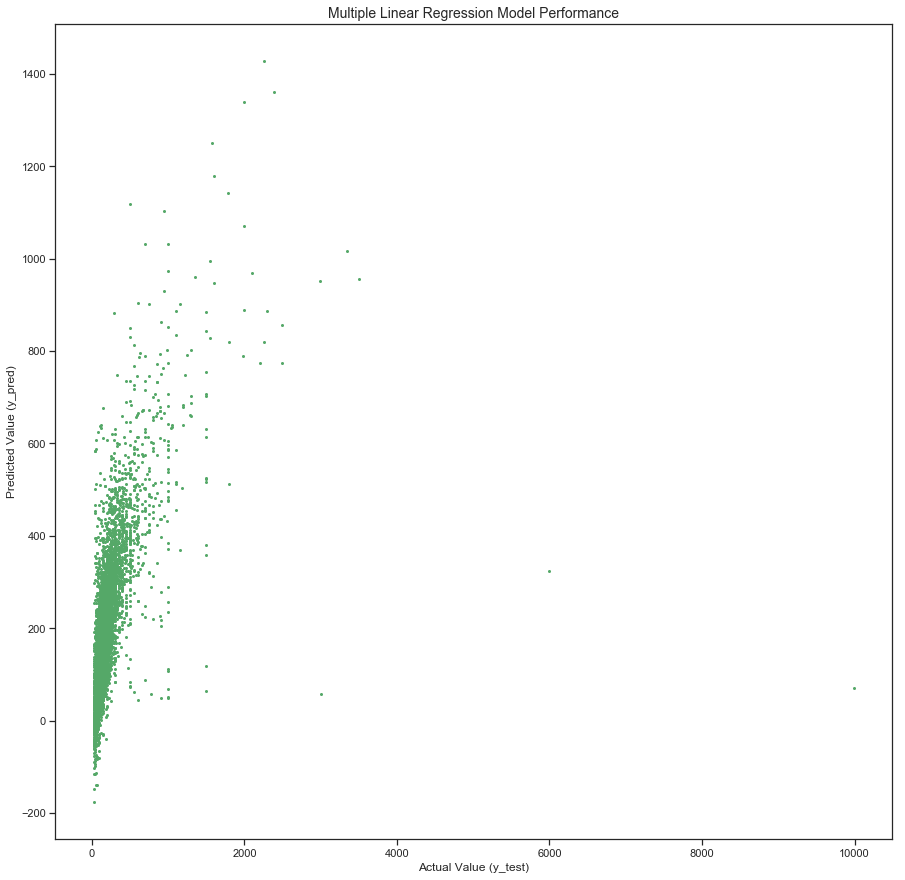

In [41]:
plt.figure(figsize=[15,15])
plt.plot(y_test,y_pred,'go',marker = 'o',markersize = 2);
plt.xlabel('Actual Value (y_test)');
plt.ylabel('Predicted Value (y_pred)');
plt.title('Multiple Linear Regression Model Performance',fontdict={'fontsize':14});

It's clear that the model could use some improvement (since R^2 is not near 1). Particularly for listings that are outliers in their price (listings costing $1000+/night), the model performs poorly and is likely to underprice a listing (i.e. it does not have the capability to identify the mega-mansions and ultra luxurious listings from the currently available features). 

Perhaps we can achieve better model performance if we engineer features to capture unique properties about these homes...

In [42]:
# Filter for expensive homes ( >$1000/night )
expensive_homes = filtered_data_all_cities[filtered_data_all_cities['price'] > 1000]

# Find most common words in the summary description of the listing
expensive_homes.summary.str.split(expand=True).stack().value_counts()

and            685
the            663
a              382
of             354
in             335
to             324
with           296
is             228
for            170
home           148
on             116
this           112
The            111
from           108
&               98
This            92
private         83
has             72
an              70
views           70
living          69
or              67
you             57
3               56
your            56
house           53
all             53
at              53
outdoor         52
perfect         50
              ... 
OVERNIGHT        1
3,500+           1
23               1
2018.            1
sunshine,        1
villa.           1
24th             1
rodeo            1
discount.        1
larger,          1
Soledad          1
20,              1
BOTH             1
Swim             1
goose            1
past.For         1
60’              1
.Gorgeous        1
Brisas.          1
Celebrities      1
cheese           1
occasional  

In [43]:
num_expensive_homes = len(expensive_homes)
print("Perc. of expensive listings with 'private' in description:",expensive_homes.summary.str.contains('private').sum() / num_expensive_homes)
print("Perc. of expensive listings with 'view' or 'views' in description:",expensive_homes.summary.str.contains('view').sum() / num_expensive_homes)

Perc. of expensive listings with 'private' in description: 0.24919093851132687
Perc. of expensive listings with 'view' or 'views' in description: 0.39158576051779936


We can see that expensive listings (greater than $1000/night) commonly have words like "private" or "views" / "view" in their summary. Makes sense! This may indicate some of the trends we observed when plotting listings onto the map of California, since coastal listings may be more likely to have words like "view", for example "beach view." "Private" is likely to be associated with homes that are not "shared" or not in a high-concentration dwelling, again an indicator of price. We can engineer features that contain the words "private" and "views" / "view" and use them to improve our model.

In [44]:
# Generate features for "private" and "view"
filtered_data_all_cities['desc_contains_private'] = np.where(filtered_data_all_cities['summary'].str.contains('private'), 1, 0)
filtered_data_all_cities['desc_contains_view'] = np.where(filtered_data_all_cities['summary'].str.contains('view'), 1, 0)

## Step 10: Build and Analyze Improved MLR Model with Engineered Features

In [45]:
# Create new correlations to price list
correlations_to_price = filtered_data_all_cities.corr().price.abs().sort_values(ascending = False)
correlations_to_price

price                                                  1.000000
bedrooms                                               0.508935
accommodates                                           0.476497
bathrooms                                              0.473605
beds                                                   0.380208
room_type_Entire home/apt                              0.269091
room_type_Private room                                 0.249122
property_type_Villa                                    0.158707
neighbourhood_cleansed_copy_Malibu                     0.146848
neighbourhood_cleansed_copy_Hollywood Hills West       0.130871
cancellation_policy_super_strict_60                    0.127057
desc_contains_view                                     0.124025
cancellation_policy_strict_14_with_grace_period        0.118730
reviews_per_month                                      0.113841
cancellation_policy_flexible                           0.108692
neighbourhood_cleansed_copy_Mission Bay 

In [46]:
# Create improved model by defining features and target
y = filtered_data_all_cities[['price']]
list_of_all_factors = correlations_to_price.keys().tolist()[1:150] # Ignores "price" target variable
X = filtered_data_all_cities[list_of_all_factors]

In [47]:
# Partition data into Training and Testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) # uses int seed of 0

In [48]:
from sklearn.linear_model import LinearRegression  

# Train model
regressor = LinearRegression()  
regressor.fit(X_train, y_train);

In [49]:
# Predict from model
y_pred = regressor.predict(X_test) 

In [50]:
from sklearn import metrics  

# Evaluate the model performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('R-squared:',regressor.score(X,y))

Mean Absolute Error: 67.09453312942267
Mean Squared Error: 32887.79245678705
Root Mean Squared Error: 181.34991716785274
R-squared: 0.3915485113007888


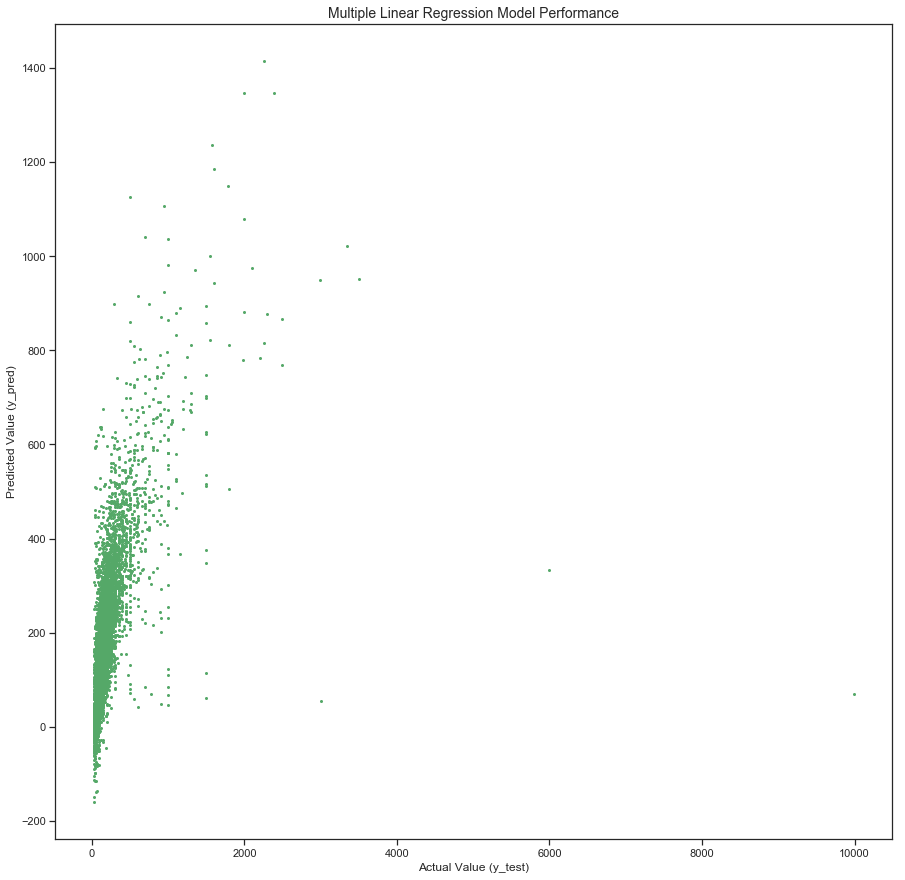

In [51]:
plt.figure(figsize=[15,15])
plt.plot(y_test,y_pred,'go',marker = 'o',markersize = 2);
plt.xlabel('Actual Value (y_test)');
plt.ylabel('Predicted Value (y_pred)');
plt.title('Multiple Linear Regression Model Performance',fontdict={'fontsize':14});

This showed minimal improvement in the model (The R^2 value did not drastically improve). 

I then took another approach to generate features from the "amenities" that would improve the price prediction...

## Step 11: Build and Analyze Final MLR Model

My approach was to browse the 'amenities' and identify potential indicators of more expensive homes, and generate features from these keywords. Amenities like "heated floors" were ideal because they would be likely to identify more expensive homes.

In [52]:
# Find features from amenities
expensive_homes.amenities.str.split(",",expand=True).stack().str.split('"',expand=True).stack().value_counts()[-150:-20]

Patio or balcony             125
Self check-in                118
BBQ grill                    114
Lock on bedroom door         110
Luggage dropoff allowed      102
Garden or backyard           100
Wide doorway                  98
Host greets you               88
Safety card                   84
Pets allowed                  84
Suitable for events           82
Step-free access              80
Bathtub                       75
24-hour check-in              74
Pack ’n Play/travel crib      56
Room-darkening shades         54
Children’s books and toys     52
Buzzer/wireless intercom      50
Full kitchen                  46
High chair                    44
Gym                           43
Breakfast                     40
Keypad                        40
Lockbox                       40
Private living room           38
Wide hallway clearance        37
Ethernet connection           37
Beach essentials              36
Well-lit path to entrance     36
Wide clearance to bed         35
          

In [53]:
# Perhaps we can utilize amenities like spa and fireplace to improve the model.
print('spa (%):',expensive_homes['amenities'].str.contains('spa').sum() / num_expensive_homes)
print('fireplace (%):',expensive_homes['amenities'].str.contains('fireplace').sum() / num_expensive_homes)
print('parking (%):',expensive_homes['amenities'].str.contains('parking').sum() / num_expensive_homes)
print('BBQ (%):',expensive_homes['amenities'].str.contains('BBQ').sum() / num_expensive_homes)
print('Washer (%):',expensive_homes['amenities'].str.contains('Washer').sum() / num_expensive_homes)
print('Hot tub (%):',expensive_homes['amenities'].str.contains('Hot tub').sum() / num_expensive_homes)
print('Private entrance (%):',expensive_homes['amenities'].str.contains('Private entrance').sum() / num_expensive_homes)
print('Wifi (%):',expensive_homes['amenities'].str.contains('Wifi').sum() / num_expensive_homes)
print('Coffee maker (%):',expensive_homes['amenities'].str.contains('Coffee maker').sum() / num_expensive_homes)
print('backyard (%):',expensive_homes['amenities'].str.contains('backyard').sum() / num_expensive_homes)
print('Suitable for events (%):',expensive_homes['amenities'].str.contains('Suitable for events').sum() / num_expensive_homes)
print('Sound system (%):',expensive_homes['amenities'].str.contains('Sound system').sum() / num_expensive_homes)
print('Wine cooler (%):',expensive_homes['amenities'].str.contains('Wine cooler').sum() / num_expensive_homes)
print('Heated floors (%):',expensive_homes['amenities'].str.contains('Heated floors').sum() / num_expensive_homes)

# Generate features for "private" and "view"
filtered_data_all_cities['desc_contains_spa'] = np.where(filtered_data_all_cities['amenities'].str.contains('spa'), 1, 0)
filtered_data_all_cities['desc_contains_fireplace'] = np.where(filtered_data_all_cities['amenities'].str.contains('fireplace'), 1, 0)
filtered_data_all_cities['desc_contains_parking'] = np.where(filtered_data_all_cities['amenities'].str.contains('parking'), 1, 0)
filtered_data_all_cities['desc_contains_BBQ'] = np.where(filtered_data_all_cities['amenities'].str.contains('BBQ'), 1, 0)
filtered_data_all_cities['desc_contains_Washer'] = np.where(filtered_data_all_cities['amenities'].str.contains('Washer'), 1, 0)
filtered_data_all_cities['desc_contains_Hot_tub'] = np.where(filtered_data_all_cities['amenities'].str.contains('Hot tub'), 1, 0)
filtered_data_all_cities['desc_contains_Private_entrance'] = np.where(filtered_data_all_cities['amenities'].str.contains('Private entrance'), 1, 0)
filtered_data_all_cities['desc_contains_Wifi'] = np.where(filtered_data_all_cities['amenities'].str.contains('Wifi'), 1, 0)
filtered_data_all_cities['desc_contains_Coffee_maker'] = np.where(filtered_data_all_cities['amenities'].str.contains('Coffee maker'), 1, 0)
filtered_data_all_cities['desc_contains_backyard'] = np.where(filtered_data_all_cities['amenities'].str.contains('backyard'), 1, 0)
filtered_data_all_cities['desc_contains_Suitable_for_events'] = np.where(filtered_data_all_cities['amenities'].str.contains('Suitable for events'), 1, 0)
filtered_data_all_cities['desc_contains_Sound_system'] = np.where(filtered_data_all_cities['amenities'].str.contains('Sound system'), 1, 0)
filtered_data_all_cities['desc_contains_Wine_cooler'] = np.where(filtered_data_all_cities['amenities'].str.contains('Wine cooler'), 1, 0)
filtered_data_all_cities['desc_contains_Heated_floors'] = np.where(filtered_data_all_cities['amenities'].str.contains('Heated floors'), 1, 0)


spa (%): 0.8576051779935275
fireplace (%): 0.7734627831715211
parking (%): 0.9546925566343042
BBQ (%): 0.36893203883495146
Washer (%): 0.9514563106796117
Hot tub (%): 0.5436893203883495
Private entrance (%): 0.5275080906148867
Wifi (%): 0.9967637540453075
Coffee maker (%): 0.4886731391585761
backyard (%): 0.32362459546925565
Suitable for events (%): 0.26537216828478966
Sound system (%): 0.04854368932038835
Wine cooler (%): 0.032362459546925564
Heated floors (%): 0.016181229773462782


In [54]:
# Create new correlations to price list
correlations_to_price = filtered_data_all_cities.corr().price.abs().sort_values(ascending = False)
correlations_to_price

price                                                  1.000000
bedrooms                                               0.508935
accommodates                                           0.476497
bathrooms                                              0.473605
beds                                                   0.380208
room_type_Entire home/apt                              0.269091
room_type_Private room                                 0.249122
desc_contains_fireplace                                0.211744
property_type_Villa                                    0.158707
neighbourhood_cleansed_copy_Malibu                     0.146848
desc_contains_Hot_tub                                  0.134380
neighbourhood_cleansed_copy_Hollywood Hills West       0.130871
cancellation_policy_super_strict_60                    0.127057
desc_contains_view                                     0.124025
desc_contains_Washer                                   0.122878
cancellation_policy_strict_14_with_grace

In [55]:
# Create improved model by defining features and target
y = filtered_data_all_cities[['price']]
list_of_all_factors = correlations_to_price.keys().tolist()[1:150] # Ignores "price" target variable
X = filtered_data_all_cities[list_of_all_factors]

In [56]:
# Partition data into Training and Testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) # uses int seed of 0

In [57]:
from sklearn.linear_model import LinearRegression  

# Train model
regressor = LinearRegression()  
regressor.fit(X_train, y_train);

In [58]:
# Predict from model
y_pred = regressor.predict(X_test) 

In [59]:
from sklearn import metrics  

# Evaluate the model performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('R-squared:',regressor.score(X,y))

Mean Absolute Error: 67.14163369005097
Mean Squared Error: 32590.085085314142
Root Mean Squared Error: 180.5272419478959
R-squared: 0.39772766760424205


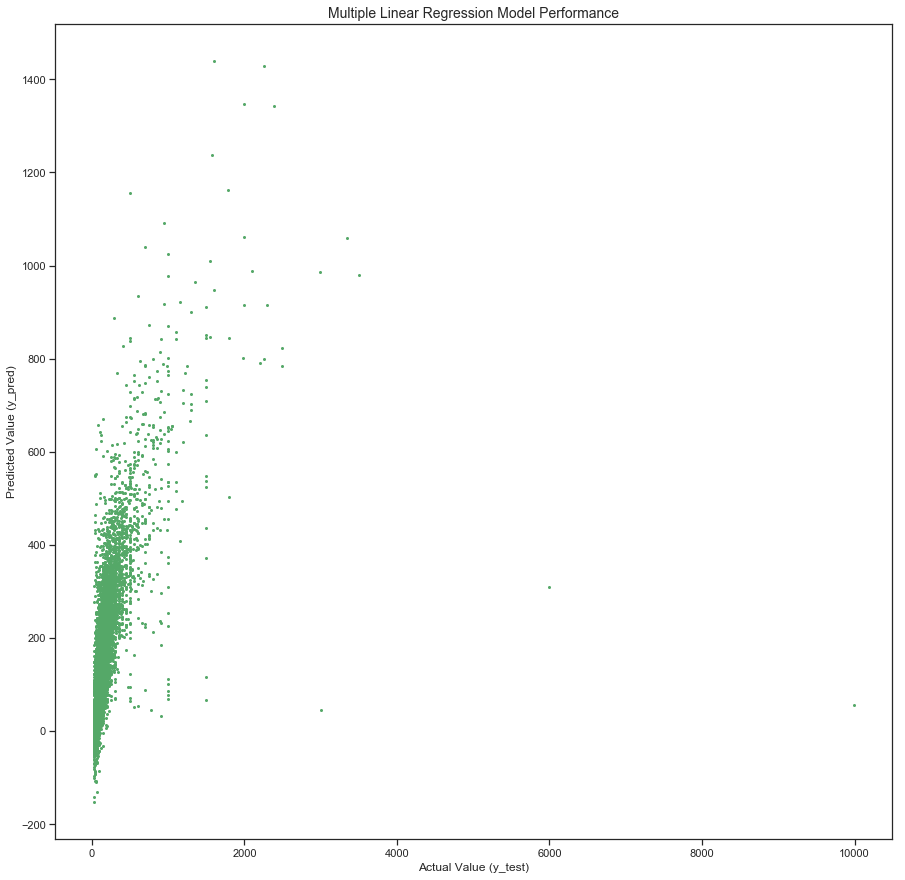

In [60]:
plt.figure(figsize=[15,15])
plt.plot(y_test,y_pred,'go',marker = 'o',markersize = 2);
plt.xlabel('Actual Value (y_test)');
plt.ylabel('Predicted Value (y_pred)');
plt.title('Multiple Linear Regression Model Performance',fontdict={'fontsize':14});

Model continues to slowly improve with the addition of features that may elucidate potential price of home, however, it appears we've approach an asymptote with regards to model performance. Perhaps we don't have enough information here to **efficiently** predict AirBnB listing prices for all cities.

A better approach may be to look at cities individually...

## Step 12: Individual City MLR Models: San Diego

In [61]:
san_diego_filtered_data = filtered_data_all_cities[filtered_data_all_cities['city_copy_San Diego'] == 1]

In [62]:
# Create new correlations to price list
correlations_to_price = san_diego_filtered_data.corr().price.abs().sort_values(ascending = False)
correlations_to_price

price                                                   1.000000
accommodates                                            0.653859
bedrooms                                                0.650050
bathrooms                                               0.647256
beds                                                    0.590950
room_type_Entire home/apt                               0.360432
room_type_Private room                                  0.348963
calculated_host_listings_count                          0.308894
longitude                                               0.306476
cancellation_policy_super_strict_60                     0.277979
neighbourhood_cleansed_copy_Mission Bay                 0.251415
desc_contains_fireplace                                 0.223737
neighbourhood_cleansed_copy_La Jolla                    0.218951
reviews_per_month                                       0.214411
availability_365                                        0.188490
desc_contains_view       

In [63]:
# Create improved model by defining features and target
y = san_diego_filtered_data[['price']]
list_of_all_factors = correlations_to_price.keys().tolist()[1:80] # Ignores "price" target variable
X = san_diego_filtered_data[list_of_all_factors]

In [64]:
# Partition data into Training and Testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) # uses int seed of 0

In [65]:
from sklearn.linear_model import LinearRegression  

# Train model
regressor = LinearRegression()  
regressor.fit(X_train, y_train);

In [66]:
# Predict from model
y_pred = regressor.predict(X_test) 

In [67]:
from sklearn import metrics  

# Evaluate the model performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('R-squared:',regressor.score(X,y))

Mean Absolute Error: 60.36509384418625
Mean Squared Error: 10128.514536747321
Root Mean Squared Error: 100.64052134576471
R-squared: 0.5933415829115827


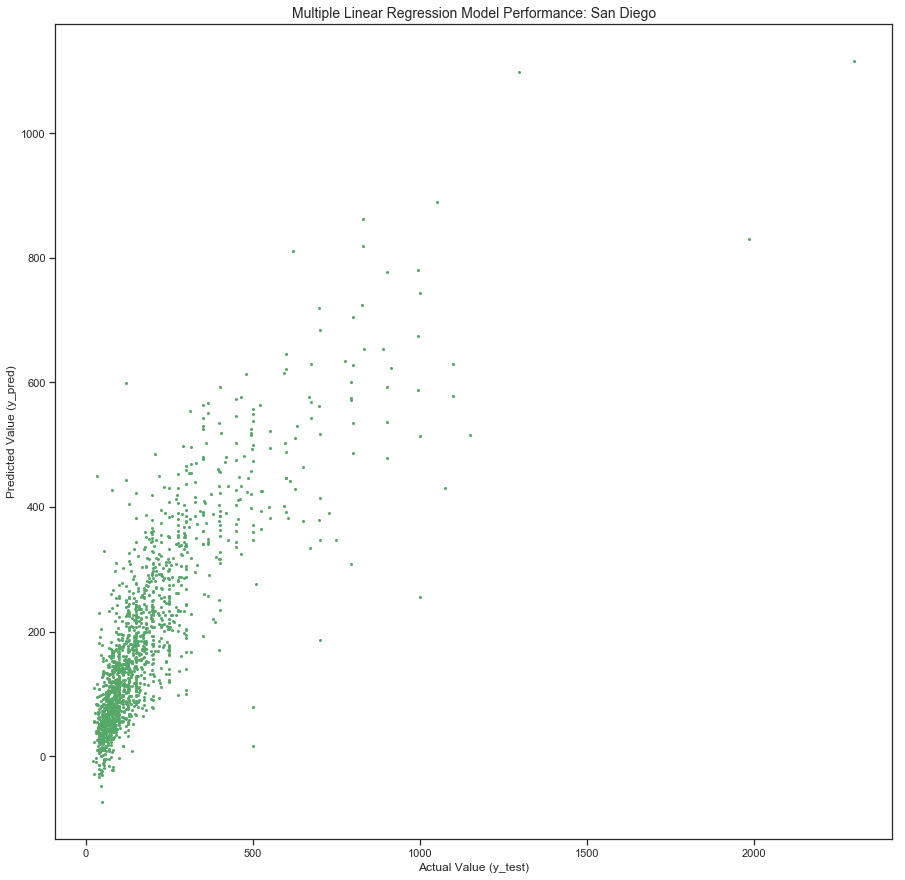

In [68]:
plt.figure(figsize=[15,15])
plt.plot(y_test,y_pred,'go',marker = 'o',markersize = 2);
plt.xlabel('Actual Value (y_test)');
plt.ylabel('Predicted Value (y_pred)');
plt.title('Multiple Linear Regression Model Performance: San Diego',fontdict={'fontsize':14});

Amazing! We now have an R^2 value of nearly 0.6! This is a drastic improvement from the complete dataset of all cities.

## Step 13: Individual City MLR Models: Los Angeles

In [69]:
los_angeles_filtered_data = filtered_data_all_cities[filtered_data_all_cities['city_copy_Los Angeles'] == 1]

In [70]:
# Create new correlations to price list
correlations_to_price = los_angeles_filtered_data.corr().price.abs().sort_values(ascending = False)
correlations_to_price

price                                                  1.000000
bedrooms                                               0.483804
bathrooms                                              0.469152
accommodates                                           0.446261
beds                                                   0.338043
room_type_Entire home/apt                              0.253533
room_type_Private room                                 0.231549
desc_contains_fireplace                                0.217280
property_type_Villa                                    0.181809
neighbourhood_cleansed_copy_Malibu                     0.178567
neighbourhood_cleansed_copy_Hollywood Hills West       0.161644
desc_contains_Hot_tub                                  0.159680
longitude                                              0.158100
desc_contains_Washer                                   0.120890
desc_contains_view                                     0.119803
cancellation_policy_strict_14_with_grace

In [71]:
# Create improved model by defining features and target
y = los_angeles_filtered_data[['price']]
list_of_all_factors = correlations_to_price.keys().tolist()[1:80] # Ignores "price" target variable
X = los_angeles_filtered_data[list_of_all_factors]

In [72]:
# Partition data into Training and Testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) # uses int seed of 0

In [73]:
from sklearn.linear_model import LinearRegression  

# Train model
regressor = LinearRegression()  
regressor.fit(X_train, y_train);

In [74]:
# Predict from model
y_pred = regressor.predict(X_test) 

In [75]:
from sklearn import metrics  

# Evaluate the model performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('R-squared:',regressor.score(X,y))

Mean Absolute Error: 63.89374450115728
Mean Squared Error: 27021.579545309738
Root Mean Squared Error: 164.3824186015942
R-squared: 0.3810680184593354


In [76]:
plt.figure(figsize=[15,15])
plt.plot(y_test,y_pred,'go',marker = 'o',markersize = 2);
plt.xlabel('Actual Value (y_test)');
plt.ylabel('Predicted Value (y_pred)');
plt.title('Multiple Linear Regression Model Performance: Los Angeles',fontdict={'fontsize':14});

We don't see an improvement in the Los Angeles model when training a MLR model to Los Angeles data only.

## Step 14: Individual City MLR Models: San Francisco

In [77]:
san_francisco_filtered_data = filtered_data_all_cities[filtered_data_all_cities['city_copy_San Francisco'] == 1]

In [78]:
# Create new correlations to price list
correlations_to_price = san_francisco_filtered_data.corr().price.abs().sort_values(ascending = False)
correlations_to_price[86:90]

property_type_Hotel                        0.011703
neighbourhood_cleansed_copy_North Beach    0.008735
maximum_nights                             0.008175
minimum_nights                             0.008085
Name: price, dtype: float64

In [79]:
# Create improved model by defining features and target
y = san_francisco_filtered_data[['price']]
list_of_all_factors = correlations_to_price.keys().tolist()[1:80] # Ignores "price" target variable
X = san_francisco_filtered_data[list_of_all_factors]

In [80]:
# Partition data into Training and Testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) # uses int seed of 0

In [81]:
from sklearn.linear_model import LinearRegression  

# Train model
regressor = LinearRegression()  
regressor.fit(X_train, y_train);

In [82]:
# Predict from model
y_pred = regressor.predict(X_test) 

In [83]:
from sklearn import metrics  

# Evaluate the model performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('R-squared:',regressor.score(X,y))

Mean Absolute Error: 83.69521180781682
Mean Squared Error: 129143.49419490003
Root Mean Squared Error: 359.36540483872403
R-squared: 0.3410563923718084


In [84]:
plt.figure(figsize=[15,15])
plt.plot(y_test,y_pred,'go',marker = 'o',markersize = 2);
plt.xlabel('Actual Value (y_test)');
plt.ylabel('Predicted Value (y_pred)');
plt.title('Multiple Linear Regression Model Performance: Los Angeles',fontdict={'fontsize':14});

We don't see an improvement in the San Francisco model when training a MLR model to San Francisco data only.

## Step 15: Conclusion

**Overall Summary:**

In this project, I built a MLR model to predict AirBnB listing prices for listings in San Francisco, Los Angeles, and San Diego. I was able to iteratively build and improve several models that provided a decent R^2 value of approximately 0.4. When analyzing cities individually, I had more success with San Diego, achieving an R^2 value of approximately 0.6, but this could not be achieved with the other cities. Overall, while this model produces a reasonable estimate of price, particularly at the lower end of the price range, owners with homes above 1000 dollars would not be wise to use this model. Owners in the San Diego area would receive considerable benefit from applying this model to their pricing strategy, as the mean absolute error was just 60 dollars. Additional feature engineering as shown in this project, would continue to improve the model performance. 

This project allowed me to utilize my instruction in Python as well as several of the major data science packages / libraries to conduct an analysis on a typical type of problem that a company like AirBnB routinely develops solutions for.

**Limitations:**

Estimating rental prices is a difficult challenge because the target variable is subject to hundreds of variables. A MLR model is appropriate for linear relationships between the target and input variables. However, it is likely that price does not follow linear relationships for many variables. This negatively impacts the ability of an MLR model to produce reliable predictions. I believe this may have happened in my model, as the error terms grew drastically at the higher end of the price range, with the linear regression model being unable to properly fit the more opulent rentals. In such cases, a different statistical approach may be more appropriate. 

One major limitation in the dataset is that price is variable on most AirBnB listings. Owners generally adjust their prices based on day of the week and time of the year, and this data is not available from the current dataset. Removing this seasonality and variability on pricing would certainly allow for a more robust model, as this model currently assumes that pricing is uniform for a particular listing. 

Perhaps the most prohibitive limitation in this dataset is the impact an owner can have on the price of a listing based on their actual revenue desires. Most owners will try to maximize revenue, but there are many factors that determine whether the full revenue potential of a listing is reached. For example, some owners perform their own cleaning and must factor in time when evaluating the price they will place on their listing. An experienced owner, as well, may have had more time to finely tune their pricing than an inexperienced one. Over time, such an owner would gravitate towards improved yield, which may or may not be associated with higher or lower price in the listing. It is very difficult to ascertain from the data whether these factors exist and to what degree they play a role in listing price.

**Areas to Extend:**

This model may improved by identifying stronger features. A future direction of this project would be to employ Principal Component Analysis to identify classifiers for segments of the listing data. For example, PCA would be well-suited to identify homes that are actually wedding venues or part of a specific region or area that is not captured by the current dataset as a city or neighborhood value. Implementation of these features, as shown in the project, would continue to improve the model performance.

Other area of improvement would include:
- Rate listing descriptions based on sentiment analysis. 
- Creation of more features such as length of listing description or number of amenities
- Include economic data from other data sources (homes for sale, average salaries, etc. in an area).
- Develop a yield-based model that includes expected yearly revenue for a listing.